In [1]:
import sys, os
sys.path.append('/cr/users/filip/bin/')

from utils.plotting import *

15:48:26 [INFO] utils.testing  -- import colorlog, logging                                                                             (+2751ms)
15:48:26 [INFO] utils.testing  -- import re                                                                                            (+2ms)
15:48:26 [INFO] utils.testing  -- import testing.tools as testing                                                                      (+2ms)
15:48:26 [INFO] utils.testing  -- import re                                                                                            (+2ms)
15:48:26 [INFO] utils.testing  -- import testing.tools as testing                                                                      (+2ms)
15:48:26 [INFO] utils.plotting -- import numpy as np                                                                                   (+2859ms)
15:48:27 [INFO] utils.plotting -- import pandas as pd                                                                                  (+340ms

In [ ]:
root = '/cr/tempdata01/filip/SSDCalib/UUBCrosscheck/Mar2023/'

for directory in ['NadiaEarlyFilteredDownsampled', 'NadiaLateFilteredDownsampled']:
    t1_info = []
    directory = root + directory

    for file in os.listdir(directory):
        t1_info.append(sum(np.loadtxt(directory + '/' + file)))

    t1_info = np.array(t1_info) / (8.33e-9 * 2048 * 5000)

    plotting.box_series(range(len(t1_info)), t1_info, label=directory.split('/')[-1])

plt.legend()
plt.xlabel('File ID')
plt.ylabel(r'Trigger rate / Hz')

In [ ]:
root = '/cr/tempdata01/filip/SSDCalib/UUBCrosscheck/Nov2022/'

for directory in ['NuriaJrFilteredDownsampled', 'NuriaJrDownsampled']:
    t1_info = []
    directory = root + directory

    for file in os.listdir(directory):
        t1_info.append(sum(np.loadtxt(directory + '/' + file)))

    t1_info = np.array(t1_info) / (8.33e-9 * 2048 * 5000)

    plotting.box_series(range(len(t1_info)), t1_info)

plt.legend()
plt.xlabel('File ID')
plt.ylabel(r'Trigger rate / Hz')

# Results presented at Trigger session

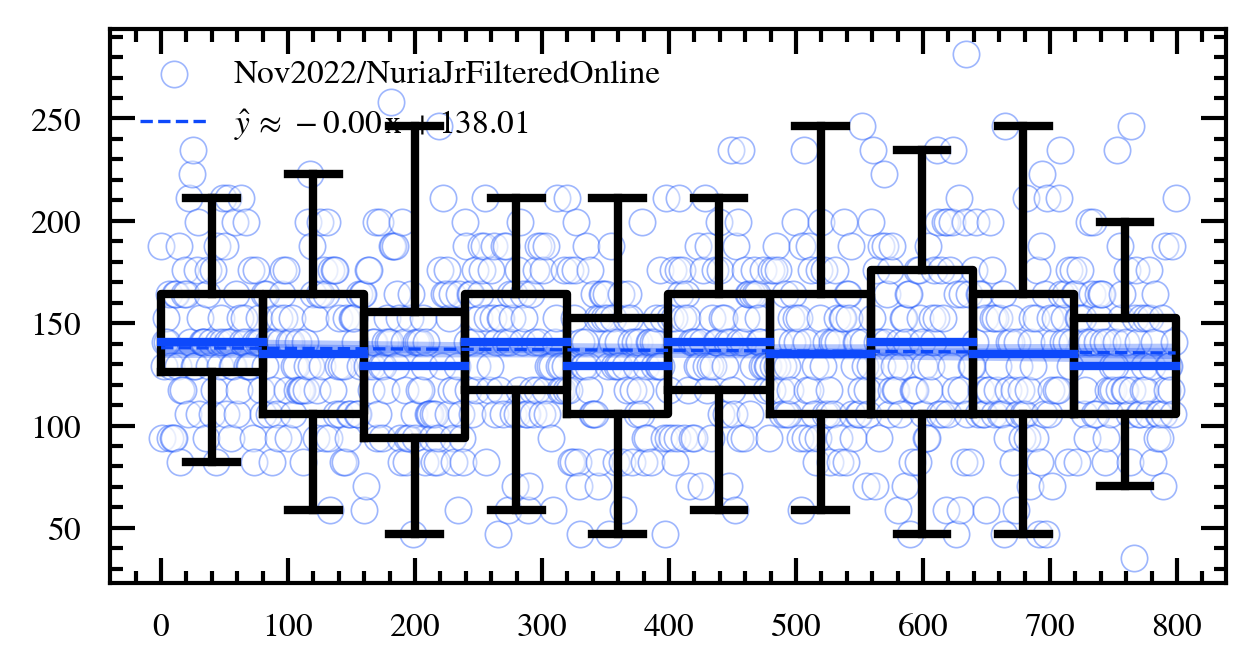

In [2]:
root = '/cr/tempdata01/filip/SSDCalib/WCDT1Calib/'

for _dir in ['Nov2022/NuriaJrFilteredOnline']:
    # if 'Peru' in _dir: continue
    t1_info = []
    for file in os.listdir(root+_dir):
        t1_info.append(sum(np.loadtxt(root + _dir + '/' + file)))

    t1_info = np.array(t1_info) / (5000 * 2048 * 8.33e-9)

    plotting.box_series(range(len(t1_info)), t1_info, label=_dir, analyze_drift=True)

plt.legend()

# Compare old and new T1 algorithm

In [ ]:
for root in ['/cr/tempdata01/filip/SSDCalib/UUBCrosscheck/Mar2023/NadiaEarlyFilteredDownsampled', 
             '/cr/tempdata01/filip/SSDCalib/WCDT1Calib/Mar2023/NadiaEarlyFilteredDownsampled']:

    t1_info = []

    for file in os.listdir(root):
        t1_info.append(sum(np.loadtxt(root + '/' + file)))

    t1_info = np.array(t1_info) / (8.33e-9 * 2048 * 5000)
    plotting.box_series(range(len(t1_info)), t1_info)

plt.legend()
plt.xlabel('File ID')
plt.ylabel('Trigger rate / Hz')